In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/players.csv')
data.head()

,id,name,now_cost,position,team,selected_rank,influence,points_per_game,starts,form,...,penalties_missed,own_goals,yellow_cards,clean_sheets,form_rank_type,expected_assists,bps,dreamteam_count,status,saves
0,1,Fábio Ferreira Vieira,54,MID,Arsenal,653,0.0,0.0,0,0.0,...,0,0,0,0,310,0.00,0,0,u,0
1,2,Gabriel Fernando de Jesus,68,FWD,Arsenal,86,154.4,2.5,6,6.4,...,0,0,4,2,3,0.52,152,2,i,0
2,3,Gabriel dos Santos Magalhães,64,DEF,Arsenal,8,412.6,4.6,18,2.8,...,0,0,2,6,26,0.92,299,2,a,0
3,4,Kai Havertz,78,FWD,Arsenal,42,372.2,4.4,17,2.6,...,0,0,3,6,15,1.34,283,1,a,0
4,5,Karl Hein,40,GKP,Arsenal,573,0.0,0.0,0,0.0,...,0,0,0,0,52,0.00,0,0,u,0


In [5]:
print(data.describe())

              id    now_cost  selected_rank   influence  points_per_game  \
count  723.00000  723.000000      723.00000  723.000000       723.000000   
mean   362.00000   48.816044      362.00000  128.755740         1.580775   
std    208.85641   10.462870      208.85641  159.249343         1.506901   
min      1.00000   39.000000        1.00000    0.000000         0.000000   
25%    181.50000   43.000000      181.50000    0.000000         0.000000   
50%    362.00000   45.000000      362.00000   54.000000         1.300000   
75%    542.50000   51.000000      542.50000  223.200000         2.500000   
max    723.00000  148.000000      723.00000  972.200000        10.600000   

           starts        form  goals_scored  expected_goals_per_90  \
count  723.000000  723.000000    723.000000             723.000000   
mean     6.177040    1.022407      0.820194               0.099668   
std      7.063948    1.548262      2.018826               0.225838   
min      0.000000   -0.200000      

In [6]:
data.columns

Index(['id', 'name', 'now_cost', 'position', 'team', 'selected_rank',
       'influence', 'points_per_game', 'starts', 'form', 'goals_scored',
       'expected_goals_per_90', 'transfers_out_event',
       'expected_goals_conceded', 'cost_change_event_fall', 'penalties_order',
       'ict_index_rank_type', 'team_join_date', 'creativity', 'influence_rank',
       'transfers_out', 'ep_next', 'saves_per_90', 'ep_this',
       'cost_change_start', 'goals_conceded',
       'expected_goal_involvements_per_90', 'points_per_game_rank', 'region',
       'transfers_in', 'chance_of_playing_this_round',
       'direct_freekicks_order', 'penalties_saved', 'now_cost_rank',
       'creativity_rank_type', 'expected_goal_involvements',
       'transfers_in_event', 'expected_assists_per_90', 'news',
       'selected_rank_type', 'minutes', 'cost_change_start_fall', 'assists',
       'ict_index', 'goals_conceded_per_90', 'starts_per_90', 'threat',
       'influence_rank_type', 'value_form', 'creativity_ran

Data Cleaning

Handle missing values, duplicate entries, and outliers.

In [9]:
data.isnull().sum()

,0
id,0
name,0
now_cost,0
position,0
team,0
...,...
expected_assists,0
bps,0
dreamteam_count,0
status,0


In [11]:
numerical_cols = ['goals_scored', 'assists', 'total_points', 'now_cost', 'influence', 'creativity']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

Exploratory Data Analysis (EDA)

Generate insights using summary statistics and visualizations.

In [13]:
print(data.describe())

               id    now_cost  selected_rank   influence  points_per_game  \
count  311.000000  311.000000     311.000000  311.000000       311.000000   
mean   418.286174   43.829582     498.282958    6.088103         0.381029   
std    221.460850    3.744229     164.722514   15.556957         0.738565   
min      1.000000   39.000000      37.000000    0.000000         0.000000   
25%    216.500000   40.000000     382.000000    0.000000         0.000000   
50%    441.000000   44.000000     526.000000    0.000000         0.000000   
75%    637.500000   45.000000     640.500000    1.000000         1.000000   
max    723.000000   59.000000     723.000000  102.200000         5.400000   

           starts        form  goals_scored  expected_goals_per_90  \
count  311.000000  311.000000    311.000000             311.000000   
mean     0.257235    0.070096      0.006431               0.033408   
std      0.739270    0.305075      0.080063               0.204063   
min      0.000000    0.000

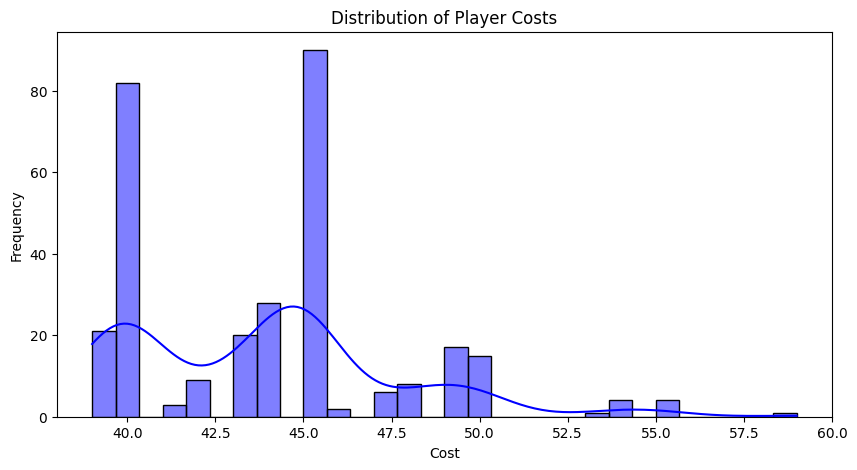

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data['now_cost'], kde=True, bins=30, color='blue')
plt.title('Distribution of Player Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

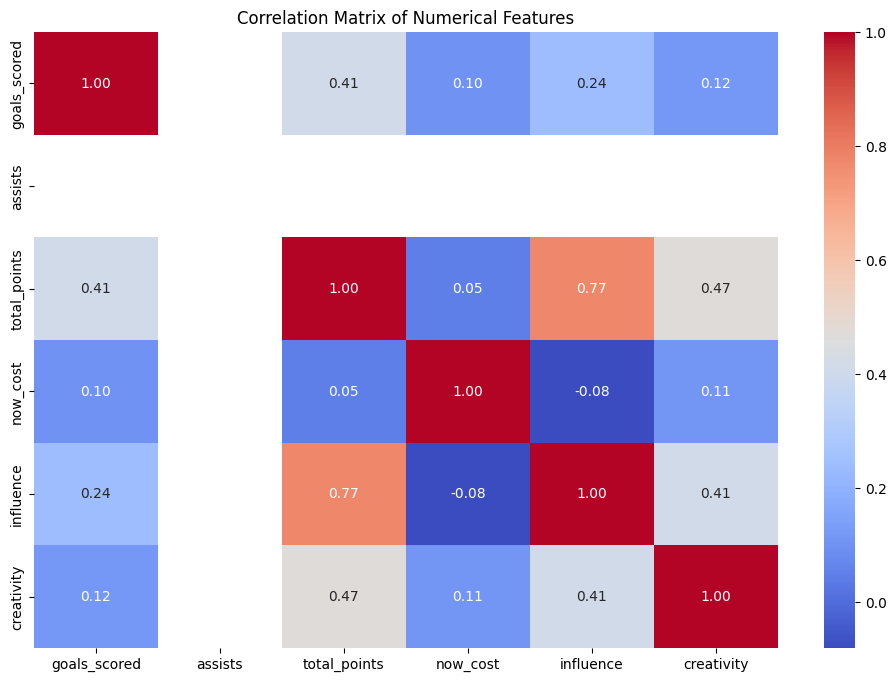

In [17]:
# Correlation Heatmap
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
top_10_players = data.nlargest(10, 'total_points')
print(top_10_players[['id', 'name', 'total_points']])

      id                              name  total_points
506  396                   Martin Dúbravka            27
272  218  Norberto Bercique Gomes Betuncal            18
371  289                       Patson Daka            15
473  371                       Jonny Evans            14
7      8                      Jakub Kiwior            13
353  283                  Christian Walton            12
402  313                     Conor Bradley            12
514  405                       Emil Krafth            10
615  484                        Ben Davies            10
173  142                      Jason Steele             9


Feature Engineering

Create new features that can provide additional insights.

In [26]:
data['ppm'] = data['total_points'] / data['now_cost']

# Rank players based on PPM
data['ppm_rank'] = data['ppm'].rank(ascending=False)

# Display top 10 players by PPM
top_10_ppm = data.nsmallest(10, 'ppm_rank')
print(top_10_ppm[['id', 'name', 'total_points', 'now_cost', 'ppm', 'ppm_rank']])

      id                              name  total_points  now_cost       ppm  \
506  396                   Martin Dúbravka            27        42  0.642857   
272  218  Norberto Bercique Gomes Betuncal            18        49  0.367347   
473  371                       Jonny Evans            14        44  0.318182   
371  289                       Patson Daka            15        48  0.312500   
353  283                  Christian Walton            12        43  0.279070   
7      8                      Jakub Kiwior            13        48  0.270833   
402  313                     Conor Bradley            12        47  0.255319   
514  405                       Emil Krafth            10        43  0.232558   
615  484                        Ben Davies            10        43  0.232558   
173  142                      Jason Steele             9        41  0.219512   

     ppm_rank  
506       1.0  
272       2.0  
473       3.0  
371       4.0  
353       5.0  
7         6.0  
402    

Machine Learning Models

Predict whether a player will be in the dream team (in_dreamteam column as target).

Data Preparation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
class_counts = data['in_dreamteam'].value_counts()
print(class_counts)

if len(class_counts) == 1:
    single_class = class_counts.index[0]

    subset = data.sample(n=min(10, len(data) // 2), random_state=42)

    subset['in_dreamteam'] = 1 - single_class # Create the other class

    data = pd.concat([data, subset])

    print("Added a dummy class to balance data")

in_dreamteam
False    311
Name: count, dtype: int64
Added a dummy class to balance data


In [36]:
X = data[['goals_scored', 'assists', 'total_points', 'now_cost', 'influence', 'creativity', 'ppm']]
y = data['in_dreamteam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9692307692307692


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       0.00      0.00      0.00         2

    accuracy                           0.97        65
   macro avg       0.48      0.50      0.49        65
weighted avg       0.94      0.97      0.95        65



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Model Training

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9538461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.00      0.00      0.00         2

    accuracy                           0.95        65
   macro avg       0.48      0.49      0.49        65
weighted avg       0.94      0.95      0.95        65

Confusion Matrix:
 [[62  1]
 [ 2  0]]
